# Autoencoders para la detección de anomalías cardiacas 

## 1- El problema a resolver

Detectar la presencia (sujeto *anormal*) o ausencia (sujeto *normal*) de irregularidades en el ritmo cardiaco, a partir de señales electrocardiográficas (ECG):

![](https://drive.google.com/uc?export=view&id=1pzydaNRbcSh1E-S4Ebh0jJEqsim6DeM9)

El problema es que usualmente se cuenta con sets de datos **desbalanceados** con más datos normales que anormales.

## 2- El set de datos

Se usará el set [ECG5000](https://timeseriesclassification.com/description.php?Dataset=ECG5000) con 7600 datos de entrenamiento y 1900 de prueba.

Cada dato contiene un ciclo cardiaco con 140 muestras, y que puede pertenecer a una de 5 categorías:

1. Normal
2. Anormal: contracción ventricular prematura
3. Anormal: contracción supra-ventricular prematura
4. Anormal: latido ectópico
5. Anormal pero patología desconocida

![](https://drive.google.com/uc?export=view&id=1x_sUD1rbM4MM4--s9D4wacRIWEo8aAzL)


## 3- Autoencoders y detección de anomalías

El problema del set ECG5000 es que contiene 4427 datos normales y 3173 anormales, es decir está desbalanceado.

De hecho para ciertas categorías anormales (2 a 4) se tienen muy pocos datos:

| Categoría   | Nro. datos |
|-------------|------------|
| 1 (normal)  | 4427       |
| 2 (anormal) | 2683       |
| 3 (anormal) | 149        |
| 4 (anormal) | 306        |
| 5 (anormal) | 35         |

Así que en lugar de un modelo de clasificación convencional (como una Red Neuronal) se usará un Autoencoder:

![](https://drive.google.com/uc?export=view&id=1LnoIDmfctQr5wmJaojFrZEA1ygPynylu)

El autoencoder se entrenará **únicamente con datos normales**. Así, al reconstruir un dato anormal **el error será alto**.

## 4- Implementación

### 4.1. Preparación de Google Drive y lectura de los sets de entrenamiento y prueba

In [17]:
# from google.colab import drive
# drive.mount('/gdrive')

In [104]:
ruta = '/gdrive/MyDrive/videos/2021-06-25/'
ruta = ''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_train = pd.read_csv(ruta + 'ECG5000_train.csv')
df_test = pd.read_csv(ruta + 'ECG5000_test.csv')

In [34]:
print(df_train.shape)
print(df_test.shape)

(7600, 141)
(1900, 141)


In [35]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-1.30300,-0.83573,-1.9336,-2.09420,-2.02840,-1.2531,-0.52638,-0.089286,-0.07557,...,-1.45820,-1.6676,-1.5977,-1.67930,-1.677200,-1.69370,-1.79410,-1.35940,-2.08120,-2.82880
1,2,0.32288,-0.87847,-1.8023,-2.66850,-3.26550,-3.3326,-2.88000,-2.227400,-1.54360,...,-1.23050,-1.7218,-2.1953,-2.74890,-3.446500,-3.66210,-3.01820,-1.65140,-0.23670,0.82832
2,2,1.39340,1.59260,1.2420,0.79449,0.19577,-0.3156,-0.58053,-0.945020,-1.23350,...,-1.90850,-2.5295,-3.0614,-3.50370,-3.900400,-4.24600,-4.13380,-3.19850,-2.42200,-1.07370
3,1,-3.52270,-5.02610,-4.3613,-4.10570,-3.10420,-1.8178,-1.39840,-1.070100,-0.40691,...,0.83038,1.0084,1.1830,0.94636,0.952130,0.79343,0.84741,1.01390,0.31234,-2.19060
4,1,-1.91820,-3.22510,-3.4652,-4.00800,-3.87030,-3.3581,-2.28540,-1.728500,-1.42220,...,1.77690,1.5029,1.1651,0.46073,0.019172,-0.32739,-0.48051,-0.18814,0.14284,-0.66844


In [36]:
df_train['0'].value_counts()

0
1    4427
2    2683
4     306
3     149
5      35
Name: count, dtype: int64

# Primera solución: problema de clasificación

In [89]:
df_train["0"].value_counts()

y_train = df_train["0"] - 1
x_train = df_train.drop(columns=["0"])
y_test = df_test["0"] - 1
x_test = df_test.drop(columns=["0"])

import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential()
model.add(Input(shape=(140,)))
model.add(Dense(5, activation="softmax"))

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │           705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy)
history = model.fit(x=x_train, y=y_train, epochs=30)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
Epoch 1/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.6667
Epoch 2/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.2540
Epoch 3/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.2359
Epoch 4/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.2281
Epoch 5/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.2392
Epoch 6/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.2146
Epoch 7/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.2251
Epoch 8/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.2090
Epoch 9/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.2028
Epoch 10/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.2117
Epoch 11/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.2201
Epoch 12/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.2032
Epoch 13/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.1967
Epoch 14/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step -

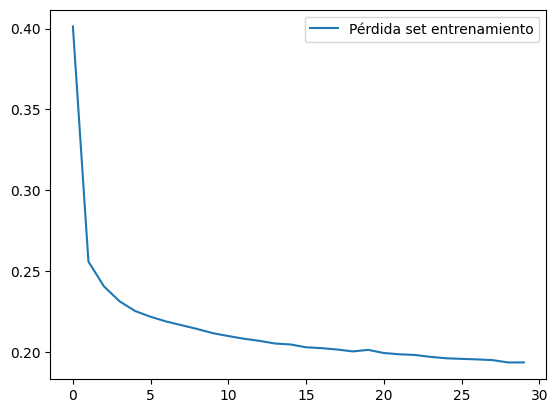

In [93]:
plt.plot(history.history["loss"], label="Pérdida set entrenamiento")
plt.legend()

In [99]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step


0.9463157894736842
Accuracy clase 0: 0.9929
Accuracy clase 1: 0.9510
Accuracy clase 2: 0.5758
Accuracy clase 3: 0.4286
Accuracy clase 4: 0.0000


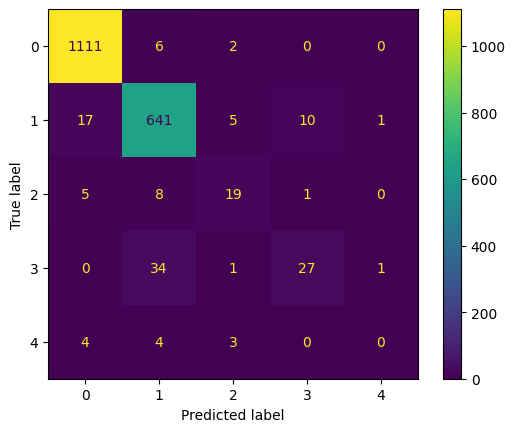

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf = confusion_matrix(y_test, predictions)
conf = ConfusionMatrixDisplay(cf)

conf.plot()
print(np.mean(y_test == predictions))

accuracy_per_class = np.diag(cf) / np.sum(cf, axis=1)

# Imprimir resultados
for i, acc in enumerate(accuracy_per_class):
    print(f'Accuracy clase {i}: {acc:.4f}')

In [113]:

callbacks_model = [
    EarlyStopping(monitor="val_loss", patience=5, verbose=1),
    ModelCheckpoint(filepath="model.keras", save_best_only=True, verbose=1)
    
]

model = Sequential()
model.add(Input(shape=(140,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train, 
    y_train, 
    epochs=300, 
    batch_size=32, 
    validation_data=(x_test, y_test), 
    callbacks=callbacks_model
)
# model.compile(loss=keras.losses.SparseCategoricalCrossentropy())

# model.summary()

predictions = model.predict(x_train)
predictions_label = np.argmax(predictions, axis=1)

predictions_label[:2]

accuracy = np.mean(predictions_label == y_train)
print(accuracy)

Epoch 1/300
201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.7869 - loss: 0.6471
Epoch 1: val_loss improved from inf to 0.19656, saving model to model.keras
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.5981 - val_accuracy: 0.9426 - val_loss: 0.1966
Epoch 2/300
202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.9449 - loss: 0.1849
Epoch 2: val_loss improved from 0.19656 to 0.16199, saving model to model.keras
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9447 - loss: 0.1857 - val_accuracy: 0.9484 - val_loss: 0.1620
Epoch 3/300
206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.9494 - loss: 0.1689
Epoch 3: val_loss improved from 0.16199 to 0.15478, saving model to model.keras
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9493 - loss: 0.1690 - val_accuracy: 0.9579 - val_loss: 0.1548
Epoch 4/300
216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9532 - loss: 0.1655
Epoch 4: val_loss improved from 0.15478 to 0.14506, savin

### 4.2. Sets de entrenamiento y validación

In [115]:
# Pandas a arreglos numpy
datos_train = df_train.values
datos_test = df_test.values

# Etiquetas
cat_train = datos_train[:,0]
cat_test = datos_test[:,0]

# Subdivisión por categorías
x_train_1 = datos_train[cat_train==1,1:]
x_train_2 = datos_train[cat_train==2,1:]
x_train_3 = datos_train[cat_train==3,1:]
x_train_4 = datos_train[cat_train==4,1:]
x_train_5 = datos_train[cat_train==5,1:]

x_test_1 = datos_test[cat_test==1,1:]
x_test_2 = datos_test[cat_test==2,1:]
x_test_3 = datos_test[cat_test==3,1:]
x_test_4 = datos_test[cat_test==4,1:]
x_test_5 = datos_test[cat_test==5,1:]

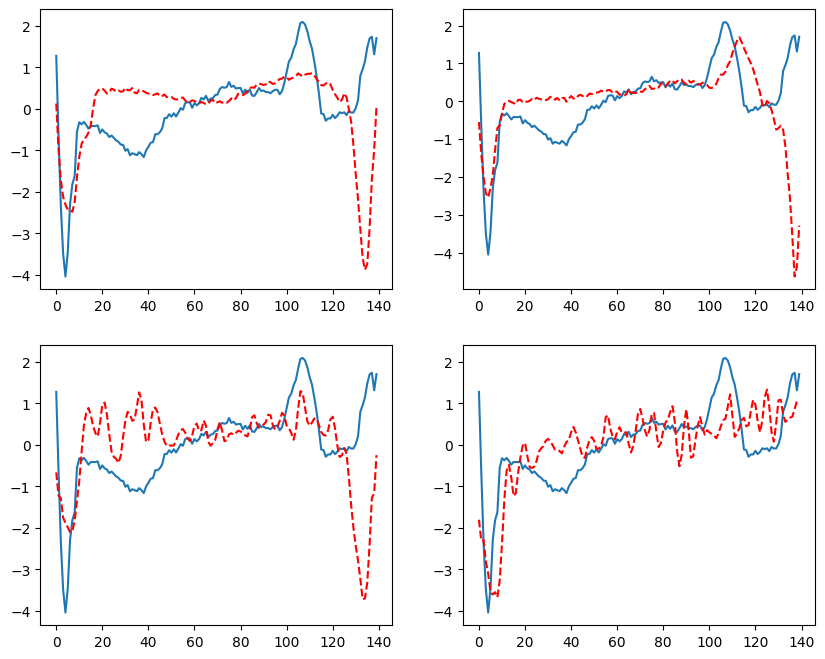

In [116]:
# Dibujar un dato normal y uno de cada anormal
import matplotlib.pyplot as plt
import numpy as np

ind = 10
normal = x_train_1[ind]
anormal_2 = x_train_2[ind]
anormal_3 = x_train_3[ind]
anormal_4 = x_train_4[ind]
anormal_5 = x_train_5[ind]

plt.figure(figsize=(10,8))
# plt.grid()
plt.subplot(2,2,1)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_2, 'r--')
plt.subplot(2,2,2)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_3, 'r--')
plt.subplot(2,2,3)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_4, 'r--')
plt.subplot(2,2,4)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_5, 'r--')
plt.show()

### 4.3. Preprocesamiento (normalización)

In [118]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

x_train_1_s = min_max_scaler.fit_transform(x_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(x_train_1), np.max(x_train_1)))
print('Mínimo y máximo normalización: {:.1f}, {:.1f}'.format(np.min(x_train_1_s), np.max(x_train_1_s)))

x_test_1_s = min_max_scaler.transform(x_test_1)
x_test_2_s = min_max_scaler.transform(x_test_2)
x_test_3_s = min_max_scaler.transform(x_test_3)
x_test_4_s = min_max_scaler.transform(x_test_4)
x_test_5_s = min_max_scaler.transform(x_test_5)

Mínimo y máximo originales: -7.1, 5.0
Mínimo y máximo normalización: 0.0, 1.0


### 4.4. Creación del Autoencoder en TensorFlow/Keras

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
np.random.seed(23)

dim_entrada = x_train_1_s.shape[1]    #140 muestras/ejemplo
entrada = Input(shape=(dim_entrada,))

# Encoder
encoder = Dense(32, activation='relu')(entrada)
encoder = Dense(16, activation='relu')(encoder)
encoder = Dense(8, activation='relu')(encoder)

# Decoder
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(decoder)
decoder = Dense(140, activation='sigmoid')(decoder)

# Autoencoder = entrada + decoder (que ya contiene el encoder)
autoencoder = Model(inputs=entrada, outputs=decoder)

autoencoder.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         4,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 140)            │         4,620 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,484 (40.95 KB)

 Trainable params: 10,484 (40.95 KB)

 Non-trainable params: 0 (0.00 B)

### 4.5. Optimización y entrenamiento

La pérdida será el error absoluto medio (*Mean Absolute Error*, MAE):

$MAE = \frac{\sum_{i=1}^{140} |x_i - \hat{x_i}|}{140}$

In [139]:
autoencoder.compile(optimizer='adam', loss='mae')
historia = autoencoder.fit(x_train_1_s, x_train_1_s, 
          epochs=200, 
          batch_size=512,
          validation_data=(x_test_1_s, x_test_1_s),
          shuffle=True)

Epoch 1/200


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1263 - val_loss: 0.1218
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1184 - val_loss: 0.1115
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1076 - val_loss: 0.0997
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0963 - val_loss: 0.0890
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0855 - val_loss: 0.0806
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0776 - val_loss: 0.0748
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0724 - val_loss: 0.0712
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0692 - val_loss: 0.0684
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0660 - val_loss: 0.0662
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0642 - val_loss: 0.0642
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0628 - val_loss: 0.0626
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0602 - val_loss: 0.0610
Epoch 13/200

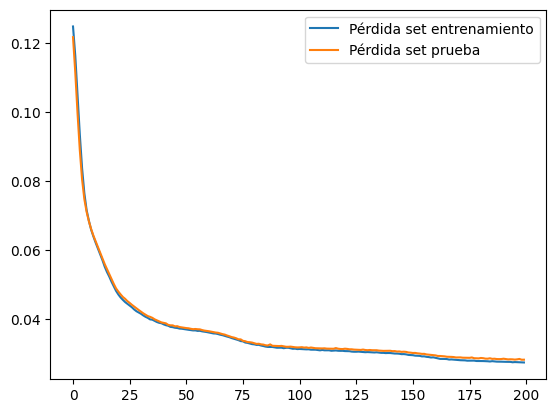

In [141]:
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.legend()

## 5- Clasificación

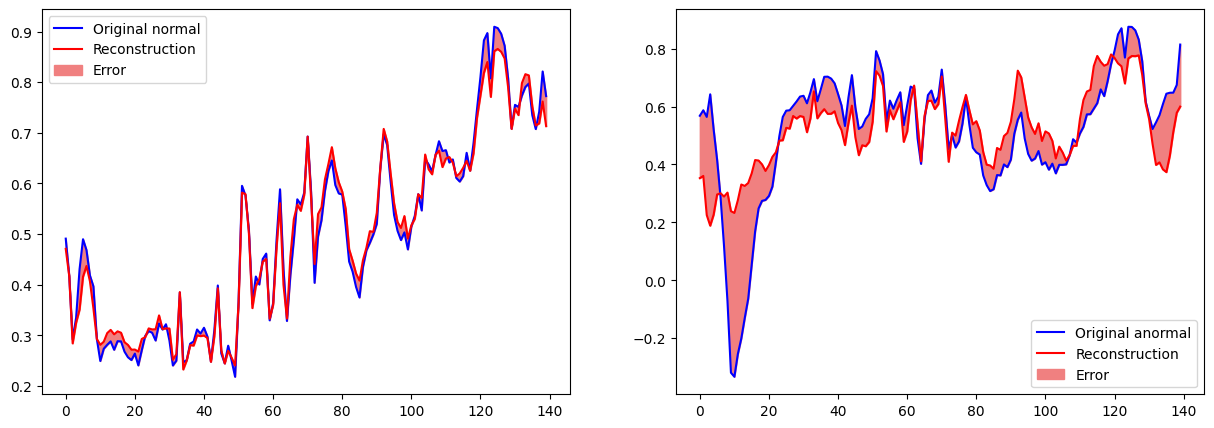

In [142]:
# ¿Qué tan bien reconstruye un dato "normal" y uno anormal?
rec_normal = autoencoder(x_test_1_s).numpy()
rec_anormal = autoencoder(x_test_5_s).numpy()

dato = 5
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x_test_1_s[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(140), rec_normal[dato], x_test_1_s[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])
plt.subplot(1,2,2)
plt.plot(x_test_5_s[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(140), rec_anormal[dato], x_test_5_s[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


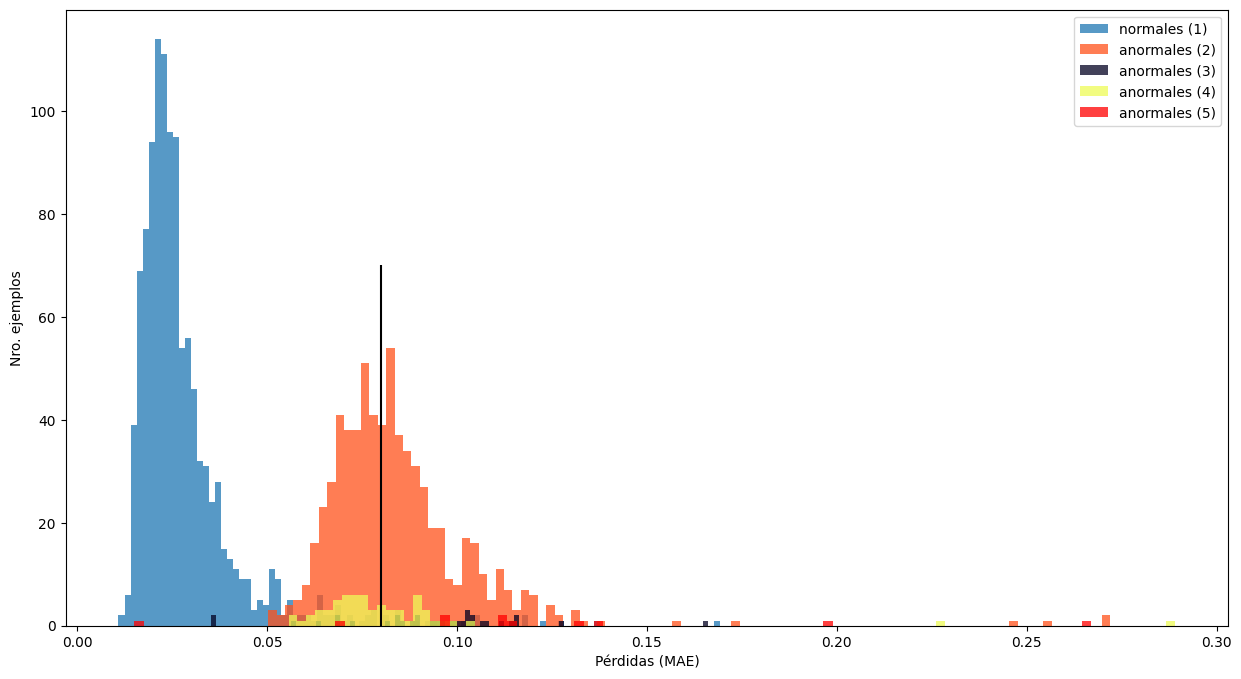

In [143]:
# Distribuciones de los errores de construcción
# para cada categoría

import tensorflow as tf

rec_1 = autoencoder.predict(x_test_1_s)
rec_2 = autoencoder.predict(x_test_2_s)
rec_3 = autoencoder.predict(x_test_3_s)
rec_4 = autoencoder.predict(x_test_4_s)
rec_5 = autoencoder.predict(x_test_5_s)

loss_1 = tf.keras.losses.mae(rec_1, x_test_1_s)
loss_2 = tf.keras.losses.mae(rec_2, x_test_2_s)
loss_3 = tf.keras.losses.mae(rec_3, x_test_3_s)
loss_4 = tf.keras.losses.mae(rec_4, x_test_4_s)
loss_5 = tf.keras.losses.mae(rec_5, x_test_5_s)


plt.figure(figsize=(15,8))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='normales (1)')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='anormales (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#020122', label='anormales (3)')
plt.hist(loss_4[None,:], bins=100, alpha=0.75, color='#eefc57', label='anormales (4)')
plt.hist(loss_5[None,:], bins=100, alpha=0.75, color='r', label='anormales (5)')
plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(0.08,0,70,'k')



In [30]:
umbral = np.mean(loss_1) + np.std(loss_1)
print("Umbral: ", umbral)

Umbral:  0.048263906633257976


### 5.1. Sensitividad y especificidad

- Verdaderos positivos (TP): anormales que han sido correctamente clasificados como anormales
- Falsos negativos (FN): anormales que han sido clasificados erróneamente como normales
- Verdaderos negativos (TN): normales que han sido correctamente clasificados como normales
- Falsos positivos (FP): normales que han sido clasificados erróneamente como anormales

La **sensitividad** mide la proporción de anormales que fueron detectados correctamente como anormales. Una sensitividad del 100% detectará a todos los pacientes enfermos:

$sensitividad = \frac{TP}{TP+FN}$

La **especificidad** mide la proporción de normales que fueron detectados correctamente como normales. Una especificidad del 100% detectará a todos los pacientes sanos:

$especificidad = \frac{TN}{TN+FP}$

In [31]:
# Calcular predicciones individuales
def predecir(modelo, datos, umbral):
    reconstrucciones = modelo(datos)
    perdida = tf.keras.losses.mae(reconstrucciones, datos)
    return tf.math.less(perdida, umbral)

def calcular_sensitividad(prediccion, titulo):
    TP = np.count_nonzero(~prediccion)
    FN = np.count_nonzero(prediccion)
    sen = 100*(TP/(TP+FN))

    print(titulo + ': {:.1f}%'.format(sen))

def calcular_especificidad(prediccion, titulo):
    TN = np.count_nonzero(prediccion)
    FP = np.count_nonzero(~prediccion)
    esp = 100*(TN/(TN+FP))

    print(titulo + ': {:.1f}%'.format(esp))
    return esp

In [32]:
# Predicciones
pred_1 = predecir(autoencoder, x_test_1_s, umbral)
pred_2 = predecir(autoencoder, x_test_2_s, umbral)
pred_3 = predecir(autoencoder, x_test_3_s, umbral)
pred_4 = predecir(autoencoder, x_test_4_s, umbral)
pred_5 = predecir(autoencoder, x_test_5_s, umbral)

# Pred1: especificidad
esp_1 = calcular_especificidad(pred_1,'Especificidad (cat. 1, normales)')

# Pred 2 a 5: sensitividad
sen_2 = calcular_sensitividad(pred_2,'Sensitividad (cat. 2, anormales)')
sen_3 = calcular_sensitividad(pred_3,'Sensitividad (cat. 3, anormales)')
sen_4 = calcular_sensitividad(pred_4,'Sensitividad (cat. 4, anormales)')
sen_5 = calcular_sensitividad(pred_3,'Sensitividad (cat. 5, anormales)')

Especificidad (cat. 1, normales): 89.7%
Sensitividad (cat. 2, anormales): 100.0%
Sensitividad (cat. 3, anormales): 93.9%
Sensitividad (cat. 4, anormales): 100.0%
Sensitividad (cat. 5, anormales): 93.9%
